<a href="https://colab.research.google.com/github/Epsita-R/Reinforcement-Learning/blob/main/2348517_CIA_1_RL_LabTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

 The UCB class implements the Upper Confidence Bound (UCB) algorithm for solving the multi-armed bandit problem.

 In this context, a "bandit" is a scenario with multiple "arms" (slot machines or options), each with an unknown probability of providing a reward. The UCB algorithm balances between exploration (trying different options to gather more information) and exploitation (choosing the option that appears to offer the highest reward based on current knowledge).

#Class Structure and Purpose
**Initialization (__init__):**
Sets up the number of slot machines (arms).
Initializes two arrays:
machine_rewards: Tracks total rewards for each machine.
machine_counts: Tracks how many times each machine has been played.
This setup allows the algorithm to track rewards and play frequency over time.

**Selecting a Machine (select_machine):**

Uses the UCB formula to choose which machine to play.

If a machine hasn't been played yet, it is selected for exploration.
For machines that have been played, it calculates:

Average Reward: Expected reward based on past plays (exploitation).

Confidence Bound: Represents uncertainty in the reward potential (exploration).
The machine with the highest UCB value is selected for play.

**Updating Machine Statistics (update_machine):**

Updates the selected machine's statistics after playing:

Increments the count of times the machine was played.

Adds the received reward to the cumulative total for that machine.
These updates help refine reward estimates, improving decision-making in future rounds.

In [ ]:
class UCB:
    def __init__(self, no_machines):
        self.no_machines = no_machines
        self.machine_rewards = np.zeros(no_machines)  # Total rewards for each machine
        self.machine_counts = np.zeros(no_machines)   # Number of times each machine was played

    def select_machine(self, round):
        """Select a slot machine using the Upper Confidence Bound algorithm."""
        ucb_values = np.zeros(self.no_machines)
        for i in range(self.no_machines):
            if self.machine_counts[i] == 0:
                              # Exploration: Select each machine at least once if it hasn't been played yet

                return i  # Play each machine once for exploration
            # Calculate UCB for each machine
            average_reward = self.machine_rewards[i] / self.machine_counts[i]
            confidence_bound = math.sqrt((2 * math.log(round + 1)) / self.machine_counts[i])
            ucb_values[i] = average_reward + confidence_bound
        return np.argmax(ucb_values)

            # Exploitation: Select the machine with the highest UCB value

    def update_machine(self, machine, reward):
        """Update rewards and counts for the selected machine."""
        self.machine_counts[machine] += 1
        self.machine_rewards[machine] += reward

**Simulate_ucb Function Overview (Short Version)**

**Purpose:**

Simulates the selection of slot machines using the Upper Confidence Bound (UCB) algorithm over a specified number of rounds to maximize rewards based on their true probabilities.

**Parameters:**

no_machines: Number of slot machines.
no_rounds: Total rounds to simulate.
true_probs: True probabilities of each machine returning a reward.

**Implementation:**

Initializes an instance of the UCB class and sets up variables for tracking total rewards and selections.
In a loop for each round:
Selects a machine using the UCB algorithm.
Simulates a reward based on the machine's true probability.
Updates machine statistics and records total rewards over time.
Return Values:

Returns total rewards, total rewards per machine, machine counts, cumulative rewards over time, and machine selection history.

In [ ]:
def simulate_ucb(no_machines, no_rounds, true_probs):
    """Simulate the slot machines using the UCB algorithm."""
    ucb_bandit = UCB(no_machines)
    total_rewards = 0
    rewards_over_time = []
    machine_selections = np.zeros((no_rounds, no_machines))

    for round in range(no_rounds):
        selected_machine = ucb_bandit.select_machine(round)
        reward = 1 if np.random.rand() < true_probs[selected_machine] else 0
        ucb_bandit.update_machine(selected_machine, reward)
        total_rewards += reward
        rewards_over_time.append(total_rewards)
        machine_selections[round, selected_machine] = 1  # Track selections

    return total_rewards, ucb_bandit.machine_rewards, ucb_bandit.machine_counts, rewards_over_time, machine_selections

# Parameters for the simulation
no_machines = 3
no_rounds = 100
true_probs = [0.2, 0.5, 0.75]  # True probabilities of each machine returning a reward

# Run the UCB simulation
total_rewards, machine_rewards, machine_counts, rewards_over_time, machine_selections = simulate_ucb(no_machines, no_rounds, true_probs)



In [ ]:
# Print the results
print(f"Total Rewards: {total_rewards}")
for i in range(no_machines):
    print(f"Machine {i + 1}: Total Rewards = {machine_rewards[i]}, Plays = {machine_counts[i]}")

Total Rewards: 74
Machine 1: Total Rewards = 1.0, Plays = 8.0
Machine 2: Total Rewards = 2.0, Plays = 10.0
Machine 3: Total Rewards = 71.0, Plays = 82.0


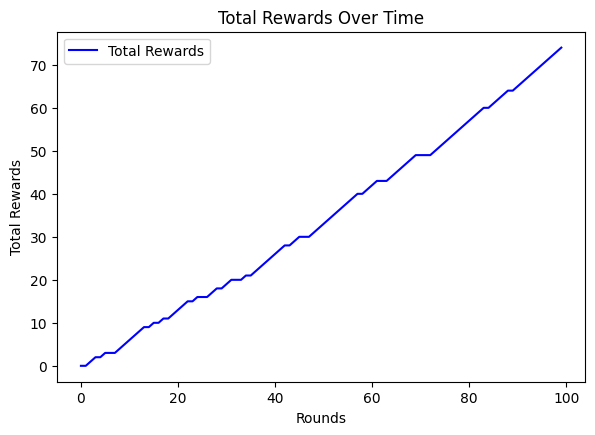

In [ ]:
# 1. Plotting the total rewards over time
plt.figure(figsize=(15, 10))

# Subplot for Total Rewards Over Time
plt.subplot(2, 2, 1)
plt.plot(rewards_over_time, label="Total Rewards", color='blue')
plt.xlabel("Rounds")
plt.ylabel("Total Rewards")
plt.title("Total Rewards Over Time")
plt.legend()

This plot shows how the average reward received per round evolves as more rounds are played. It reflects the algorithm's ability to improve its estimates of each machine's effectiveness over time. A rising line indicates that the algorithm is learning and selecting the more rewarding machines more frequently, whereas a plateau or decline could suggest that the algorithm is not effectively balancing exploration and exploitation

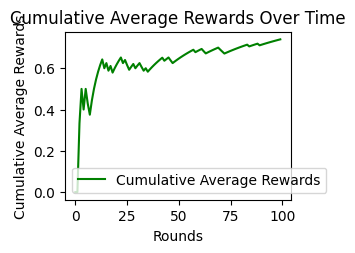

In [ ]:
# 2. Cumulative Average Rewards Over Time
cumulative_average_rewards = np.array(rewards_over_time) / np.arange(1, no_rounds + 1)
plt.subplot(2, 2, 2)
plt.plot(cumulative_average_rewards, label="Cumulative Average Rewards", color='green')
plt.xlabel("Rounds")
plt.ylabel("Cumulative Average Rewards")
plt.title("Cumulative Average Rewards Over Time")
plt.legend()

The histogram illustrates how rewards are distributed among the different machines. It provides insights into which machines performed best overall. For instance, if one machine has a significantly higher frequency of rewards compared to others, it indicates that the machine is likely more effective, helping to visualize the differences in performance across machines. This plot can also reveal whether the rewards are concentrated around a few machines or spread out more evenly.

Text(0.5, 1.0, 'Reward Distribution Histogram')

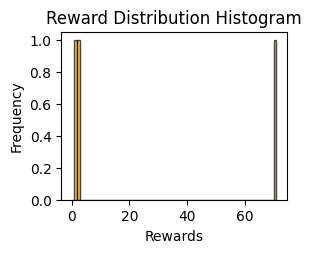

In [ ]:
# 3. Reward Distribution Histogram
plt.subplot(2, 2, 3)
plt.hist(machine_rewards, bins=np.arange(0, max(machine_rewards) + 1, 1), alpha=0.7, color='orange', edgecolor='black')
plt.xlabel("Rewards")
plt.ylabel("Frequency")
plt.title("Reward Distribution Histogram")

This bar chart indicates how many times each machine was selected throughout the simulation. It shows the exploration behavior of the UCB algorithm: ideally, a good balance between selecting high-performing machines (exploitation) and exploring lesser-played machines (exploration) will be evident. If one machine is heavily favored over others, it might suggest that the algorithm found it to be the best option early on, while if selections are more evenly distributed, it indicates a thorough exploration process.
Summary

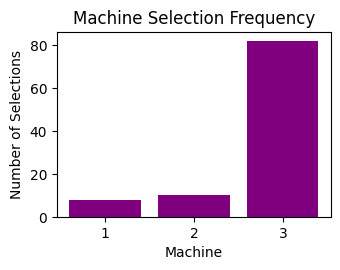

In [ ]:
#  Machine Selection Frequency?\
selection_counts = np.sum(machine_selections, axis=0)
plt.subplot(2, 2, 4)
plt.bar(range(1, no_machines + 1), selection_counts, color='purple')
plt.xticks(range(1, no_machines + 1))
plt.xlabel("Machine")
plt.ylabel("Number of Selections")
plt.title("Machine Selection Frequency")

plt.tight_layout()
plt.show()